<a href="https://colab.research.google.com/github/VanishingRasengan/WahlfachKIWiSe2324/blob/main/Lektion_2_L%C3%B6sungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with scikit-learn

Supervised learning is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data. Supervised learning uses features to predict the value of a target variable, such as predicting a basketball player's position based on their points per game. Today we will exclusively focus on supervised learning.

## What is supervised learning?
There are two types of supervised learning.
- Classification is used to predict the label, or category, of an observation. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification.
- Regression is used to predict continuous values. For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

 ## Scikit-learn syntax
 Let's familiarize ourselves with the general scikit-learn workflow syntax, before we explore using real data later in the chapter.
 1. We import a Model, which is a type of algorithm for our supervised learning problem, from an sklearn module.
 2. We create a variable named model, and instantiate the Model. A model is fit to the data, where it learns patterns about the features and the target variable.
 3. We fit the model to X, an array of our features, and y, an array of our target variable values.
 4. We then use the `model.prediction` method, passing new observations, X_new.


```
from sklearn.module import Model
model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
print(predictions)
```

Let's try it out!

# Classification
In this chapter, you'll be introduced to classification problems and learn how to solve them using supervised learning techniques. You'll learn how to split data into training and test sets, fit a model, make predictions, and evaluate accuracy. You’ll discover the relationship between model complexity and performance, applying what you learn to a churn dataset, where you will classify the churn status of a telecom company's customers.

## k-Nearest Neighbors: Fit
In this exercise, you will build your first classification model using the `churn_df` dataset, which has to be imported:

In [ ]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd
import numpy as np

# creating a path object of our data directory within the mounted Google Drive
churn_path = Path('/content/')

### to download the .csv file
!pip install wget
import wget
wget.download('https://assets.datacamp.com/production/repositories/5981/datasets/8582db71ec282f17c504c8eb794d54758fd8d5d8/telecom_churn_clean.csv')

# create another pathlib object with the path to the csv file
churn_csv_path = churn_path / 'telecom_churn_clean.csv'
churn_df = pd.read_csv(churn_csv_path)

In [ ]:
churn_df

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0



The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

- Import `KNeighborsClassifier` from `sklearn.neighbors`.
- Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.
- Instantiate a `KNeighborsClassifier` called knn with 6 neighbors.
- Fit the classifier to the data using the `.fit()` method.


In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

## k-Nearest Neighbors: Predict
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.
 You will use your classifier to predict the labels of a set of new data points:

- Create y_pred by predicting the target values of the unseen features X_new.
- Print the predicted labels for the set of predictions.

In [ ]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


## Train/test split + computing accuracy
NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the `.score()` method.

- Import train_test_split from sklearn.model_selection.
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
- Fit the knn model to the training data.
- Compute and print the model's accuracy for the test data.

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.7941176470588235


## Overfitting and underfitting
Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different `n_neighbor` values, which you will plot in the next exercise.

- Create neighbors as a numpy array of values from 1 up to and including 12.
- Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.


In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)

  	# Fit the model
  	knn.fit(X_train, y_train)

  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8878448014549863, 3: 0.8975447105183388, 4: 0.8742043043346469, 5: 0.8832979690815399, 6: 0.868748105486511, 7: 0.8748105486511064, 8: 0.8645043952712943, 9: 0.867535616853592, 10: 0.8614731736889967, 11: 0.8642012731130646, 12: 0.8602606850560776} 
 {1: 0.7352941176470589, 2: 0.8823529411764706, 3: 0.8235294117647058, 4: 0.8529411764705882, 5: 0.7941176470588235, 6: 0.8823529411764706, 7: 0.8529411764705882, 8: 0.8823529411764706, 9: 0.8823529411764706, 10: 0.8823529411764706, 11: 0.8823529411764706, 12: 0.8823529411764706}


## Visualizing model complexity
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex! You will plot the results to aid in finding the optimal number of neighbors for your model:

- Add a title "KNN: Varying Number of Neighbors".
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
- Display the plot.


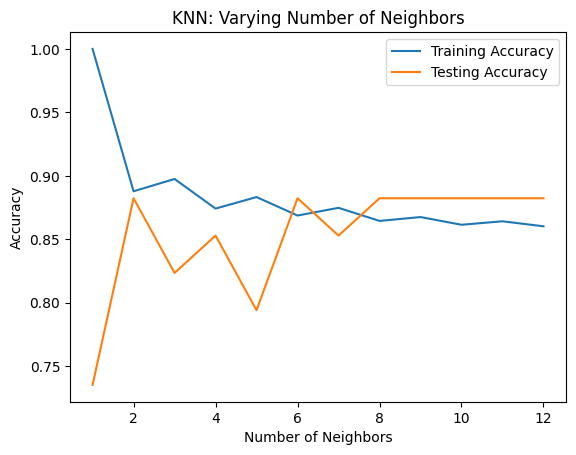

In [ ]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Great work! See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!

# Regression
Now we're going to check out the other type of supervised learning: regression. In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. First we import the dataset.

In [ ]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
sales_path = Path('/content/')

### to download the .csv file
!pip install wget
import wget
wget.download('https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv')

# create another pathlib object with the path to the csv file
sales_csv_path = sales_path / 'advertising_and_sales_clean.csv'
sales_df = pd.read_csv(sales_csv_path)
sales_df = sales_df.drop(columns="influencer")

## Creating features
You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.


- Create X, an array of the values from the sales_df DataFrame's "radio" column.
- Create y, an array of the values from the sales_df DataFrame's "sales" column.
- Reshape X into a two-dimensional NumPy array.
    Print the shape of X and y.


In [ ]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


## Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

- Import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.


In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and `sales` values.

- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.


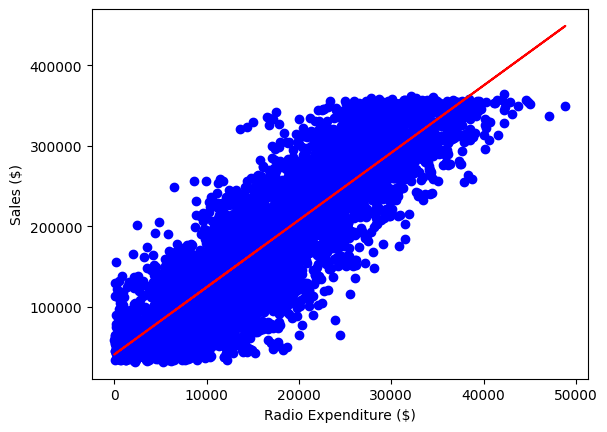

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset. You will then use this model to predict sales based on the values of the test features.

- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create `y_pred`, making predictions for sales using the test features.


In [ ]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.


In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.


- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.


In [ ]:
X = sales_df.drop(['tv', 'sales'], axis=1).values
y = sales_df["sales"].values

In [ ]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


## Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results.


- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().


In [ ]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.7536937414361207
0.012305389070474737
[0.74141863 0.77191916]


## Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their scores. You will use all of the features in the sales_df dataset to predict "sales".

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the R-squared score for each iteration of ridge.

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764388, 0.9990152104809561]


 The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

## Lasso regression for feature importance
Lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.


- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.3.
- Fit the model to the data.
- Compute the model's coefficients, storing as lasso_coef.


In [ ]:
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

[ 3.56256962 -0.00397035  0.00496385]


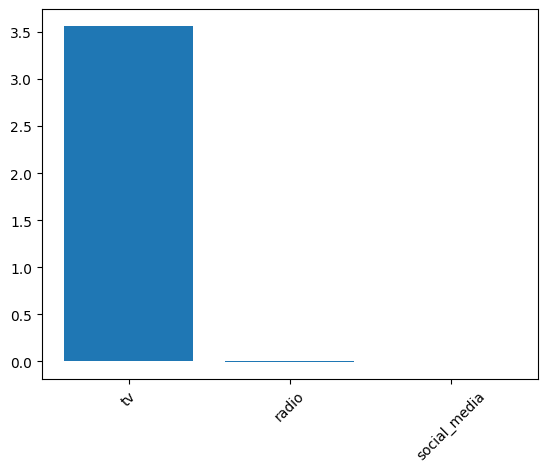

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
sales_columns = ['tv', 'radio', 'social_media']
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!

# Fine-Tuning Your Model
Having trained models, now you will learn how to evaluate them. In this chapter, you will be introduced to several metrics along with a visualization technique for analyzing classification model performance using scikit-learn. You will also learn how to optimize classification and regression models through the use of hyperparameter tuning.

## Assessing a diabetes prediction classifier

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

First we import the `diabetes_df`:

In [ ]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
diabetes_path = Path('/content/')

### to download the .csv file
import wget
wget.download('https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv')

# create another pathlib object with the path to the csv file
diabetes_csv_path = diabetes_path / 'diabetes_clean.csv'
diabetes_df = pd.read_csv(diabetes_csv_path)

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

- Split the dataframe into `X_train`, `X_test`, `y_train`, and `y_test`
- Import `confusion_matrix` and `classification_report`.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as y_pred.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.


In [ ]:
# Split into X_train, X_test, y_train, and y_test
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



The model produced 38 true positives and 27 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.


- Import LogisticRegression.
- Instantiate a logistic regression model, logreg.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.


In [ ]:
# Split into X_train, X_test, y_train, and y_test
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551023 0.18336622 0.12119649 0.15613528 0.49611198 0.44582198
 0.01359247 0.61646098 0.55640532 0.79311792]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes. You will create a ROC curve and then interpret the results.

- Import roc_curve.
- Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
- Plot true positive rate against false positive rate.


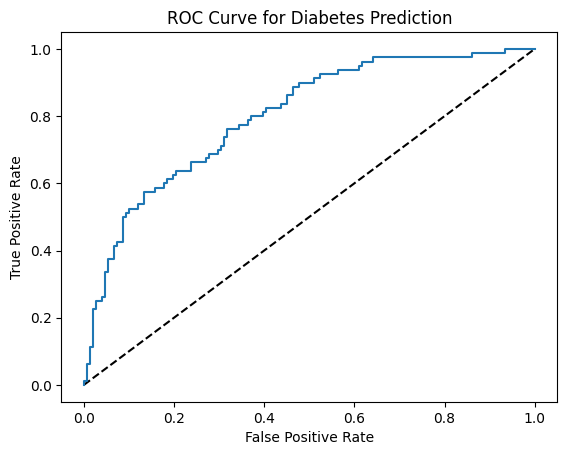

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

- Import roc_auc_score.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call classification_report().

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231

